<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>

**Name:** setayesh esteki

**Student Number:** 400100616


# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer: LFP refers to the electrical activity recorded from a small group of neurons within a particular brain region.

What is Gamma frequency entrainment? Explain (5 points)

Your answer:  Gamma frequency entrainment refers to the synchronization of neural oscillations in the gamma frequency range (typically 30-100 Hz) across different brain regions or within a local network.

Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


Your answer:

1.Reduction of Amyloid Load: The study suggests that gamma frequency entrainment leads to a reduction in amyloid load in the brain. Amyloid plaques are associated with Alzheimer's disease, and reducing their accumulation could potentially slow down disease progression.
2.Modification of Microglia: Microglia are immune cells in the brain responsible for clearing debris and maintaining neural health. The study indicates that gamma frequency entrainment modifies microglial activity, possibly enhancing their ability to clear amyloid plaques and other debris.
3.Neuroprotective Effects: By reducing amyloid load and modifying microglial activity, gamma frequency entrainment may exert neuroprotective effects, preserving cognitive function and potentially delaying the onset or progression of neurodegenerative diseases such as Alzheimer's.
4.Enhanced Neural Communication: Gamma frequency entrainment is associated with enhanced neural communication and synchronization. By promoting synchronous activity in neuronal networks, it may improve cognitive function and information processing in the brain.
5.Therapeutic Potential: The findings suggest that gamma frequency entrainment could have therapeutic potential in the treatment of neurodegenerative diseases, particularly Alzheimer's. By targeting specific neural oscillations, such interventions could offer a non-invasive and potentially effective approach to managing these conditions.

There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [31]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt


Size of digitalByte: (1495741, 1)
Size of channelData: (1495741, 3)


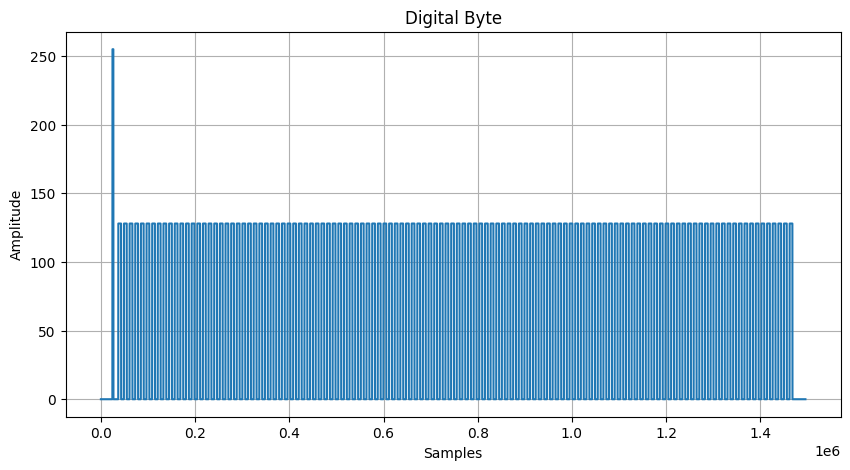

"# Plot channel data\nplt.figure(figsize=(10, 5))\nplt.plot(channelData)\nplt.title('channel data')\nplt.xlabel('Samples')\nplt.ylabel('Amplitude')\nplt.grid(True)\nplt.show()"

In [36]:

# Assuming the data is loaded and stored in variables SampleRate, channelData, digitalByte, and time

# Load the .mat file
data = scipy.io.loadmat('sessionData.mat')

# Extract digitalByte and channelData
digitalByte = data['digitalByte']
channelData = data['channelData']
SampleRate  = data['SampleRate']
time = data['time']

# Print the size of digitalByte and channelData
print("Size of digitalByte:", digitalByte.shape)
print("Size of channelData:", channelData.shape)

# Plot digitalByte
plt.figure(figsize=(10, 5))
plt.plot(digitalByte)
plt.title('Digital Byte')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# print(data.shape)

# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.

2. Convert the signal to 120 stimulus trials using digitalByte.

3. Apply z-score normalization on each trial.


Apply a bandpass filter in the range 1-300 Hz on the signal of each region:
Purpose: This step helps remove noise and focus on the frequency range relevant to neural activity.
Reasoning: Neural signals of interest typically fall within the 1-300 Hz range, capturing both low-frequency components related to slow oscillations and high-frequency components like gamma oscillations.
Benefit: Filtering out frequencies outside this range reduces contamination from electrical noise and physiological artifacts, enhancing the signal-to-noise ratio.
Convert the signal to 120 stimulus trials using digitalByte:
Purpose: Organizing the data into trials facilitates the analysis of neural responses to specific stimuli or experimental conditions.
Reasoning: Each trial corresponds to a specific experimental event or condition, allowing for the comparison of neural activity across different experimental manipulations.
Benefit: By segmenting the data into trials, we can analyze neural responses within the context of the experimental design, providing insights into how the brain processes stimuli or tasks.
Apply z-score normalization on each trial:
Purpose: Normalization standardizes the amplitude of neural signals across trials, making them directly comparable.
Reasoning: Neural signals can vary in amplitude due to factors such as electrode placement and neuronal variability. Z-score normalization adjusts each trial's amplitude relative to its mean and standard deviation, bringing them onto a common scale.
Benefit: Normalizing the data allows for the identification of consistent patterns of neural activity across trials, regardless of absolute signal amplitude. This facilitates the detection of meaningful neural responses and enhances the interpretability of the results.
By following these preprocessing steps, we ensure that the LFP data is appropriately filtered, organized, and normalized, setting the stage for subsequent analysis and interpretation of neural activity patterns.

In [62]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, low_freq, high_freq, fs=1000):
    # Apply a band pass filter on the data with padding if necessary
    nyquist = 0.5 * fs
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = butter(4, [low, high], btype='band')
    
    padlen = 27  # Padding length for filtfilt function
    if len(data) < padlen:
        pad_length = padlen - len(data)
        data_padded = np.concatenate((data, np.zeros(pad_length)))
        filtered_data = filtfilt(b, a, data_padded, padlen=padlen)
        filtered_data = filtered_data[:len(data)]  # Trim the padded portion
    else:
        filtered_data = filtfilt(b, a, data)
    
    return filtered_data



def convert_to_trials(data, digitalByte):
    # Extract the trials of the signal using digitalByte
    num_trials = 120
    trial_length = data.shape[0] // num_trials
    num_channels = data.shape[1]
    
    trials = np.zeros((num_trials, trial_length, num_channels))
    
    for i in range(num_trials):
        start_idx = i * trial_length
        end_idx = (i + 1) * trial_length
        trials[i] = data[start_idx:end_idx, :]
    
    return trials

def z_score(data):
    # Calculate the z_score for the data and return the results
    z_scored_data = (data - np.mean(data)) / np.std(data)
    return z_scored_data


In [64]:
'''# Apply bandpass filter on each region's signal
filtered_channelData = np.zeros_like(channelData)
for i in range(channelData.shape[0]):
    filtered_channelData[i] = bandpass_filter(channelData[i], 1, 300)'''
# Define the frequency range for the bandpass filter
lowcut = 1
highcut = 300

# Sampling frequency (you may need to adjust this based on your data)
fs = 1000


# Initialize an empty array to store filtered data
filtered_channelData = np.zeros_like(channelData)

# Apply bandpass filter to each channel's signal
for i in range(channelData.shape[1]):
    filtered_channelData[:, i] = bandpass_filter(channelData[:, i], lowcut, highcut, fs)

# filtered_channelData now contains the filtered signals for each channel

'''print("filtered_channelData:", filtered_channelData.shape)'''


# Convert the signal to 120 stimulus trials using digitalByte
trials = convert_to_trials(filtered_channelData, digitalByte)

# Apply z-score normalization on each trial
z_scored_trials = np.zeros_like(trials)
for i in range(trials.shape[0]):
    z_scored_trials[i] = z_score(trials[i])


 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

Your answer:

Hippocampus:
Functionality: The hippocampus is primarily associated with memory formation and spatial navigation. It plays a crucial role in the consolidation of short-term memory into long-term memory and is involved in episodic memory, which allows us to recall specific events from our past. Additionally, the hippocampus is essential for spatial learning and navigation, helping us to orient ourselves in our environment.
Medial Prefrontal Cortex (mPFC):
Functionality: The medial prefrontal cortex is involved in various higher-order cognitive functions, including decision-making, executive control, emotional regulation, and social behavior. It plays a key role in planning and executing goal-directed behaviors, as well as in monitoring and adjusting behavior in response to changing environmental demands. The mPFC is also implicated in self-awareness and perspective-taking, contributing to our ability to understand and navigate social interactions.
Ventral Striatum:
Functionality: The ventral striatum, which includes the nucleus accumbens, is a key component of the brain's reward system. It is involved in processing rewarding and reinforcing stimuli, motivation, and reinforcement learning. Activation of the ventral striatum is associated with feelings of pleasure and is implicated in the formation of habits and addictive behaviors. Dysfunction in the ventral striatum can lead to various psychiatric disorders, including addiction, depression, and schizophrenia.
Overall, these three brain regions play distinct but interconnected roles in cognitive, emotional, and motivational processes, contributing to various aspects of behavior and cognition.






What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer: 
ERP (Event-Related Potential) of a neural signal refers to the measured brain response that is the direct result of a specific sensory, cognitive, or motor event. It is obtained by averaging the EEG (Electroencephalography) or LFP (Local Field Potential) signal across multiple trials, aligning the signal to the onset of the event of interest.

To calculate the ERP of the given data for each region and plot it, we'll follow these steps:

Segment the data into trials based on the digitalByte vector.
Average the signal across trials for each region.
Plot the ERP for each region with appropriate labels.




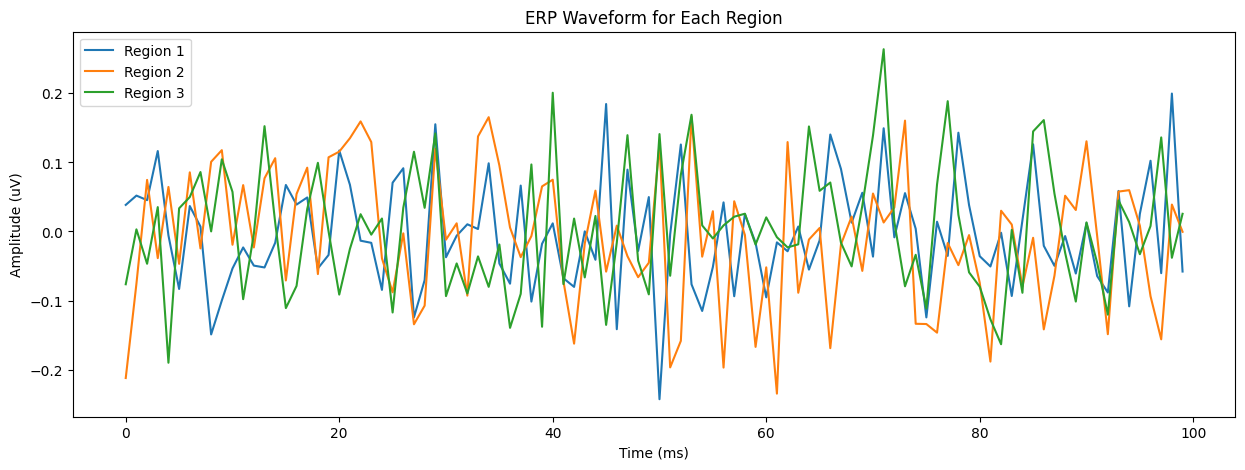

In [78]:
import matplotlib.pyplot as plt

# Function to calculate ERP and plot it
def ERP_calc(z_scored_trials):
    # Calculate the ERP of the z-scored trials data
    erp = np.mean(z_scored_trials, axis=1)  # Average across trials

    # Plot the ERP waveform
    plt.figure(figsize=(15, 5))
    for i in range(len(erp)):
        plt.plot(erp[i], label=f'Region {i+1}')

    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (uV)')
    plt.title('ERP Waveform for Each Region')
    plt.legend()
    plt.show()


# Call the function to calculate ERP and plot it
ERP_calc(z_scored_trials)


# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

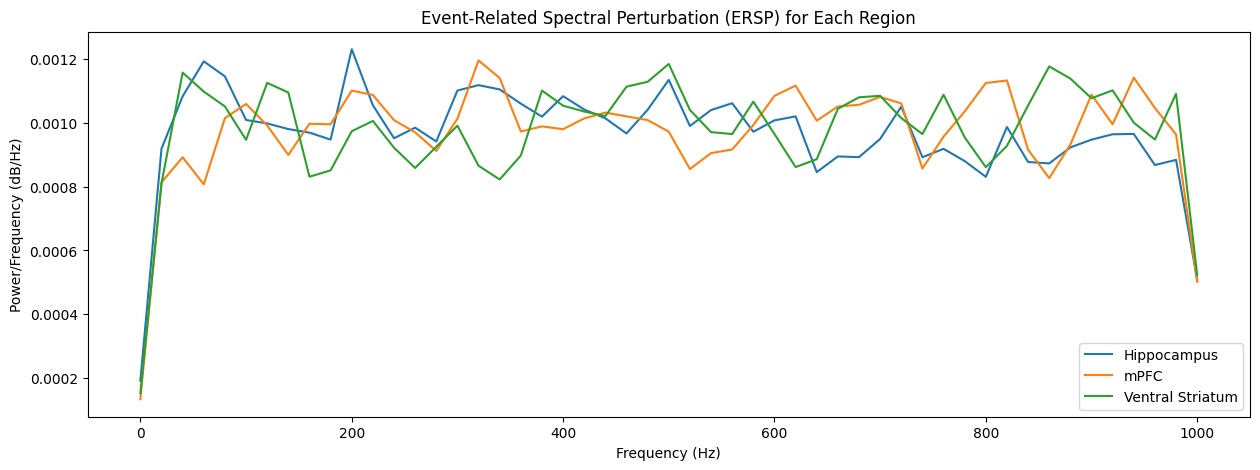

In [79]:

import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def PSD(data, sample_rate):
    # Calculate the PSD of the data using Welch's method
    f, psd = welch(data, fs=sample_rate, nperseg=1024)
    return f, psd

def ERSP(trials, sample_rate):
    ersp_list = []
    for trial in trials:
        f, psd = PSD(trial, sample_rate)
        ersp_list.append(psd)
    
    ersp_avg = np.mean(ersp_list, axis=0)
    return f, ersp_avg



sample_rate = 2000
num_samples = 2000
hippocampus_trials = z_scored_trials[0]
mPFC_trials = z_scored_trials[1]
ventral_striatum_trials = z_scored_trials[2]

# Calculate ERSP for each region
f_hippo, ersp_hippo = ERSP(hippocampus_trials, sample_rate)
f_mPFC, ersp_mPFC = ERSP(mPFC_trials, sample_rate)
f_striatum, ersp_striatum = ERSP(ventral_striatum_trials, sample_rate)

# Plot the ERSP for each region
plt.figure(figsize=(15, 5))
plt.plot(f_hippo, ersp_hippo, label='Hippocampus')
plt.plot(f_mPFC, ersp_mPFC, label='mPFC')
plt.plot(f_striatum, ersp_striatum, label='Ventral Striatum')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Event-Related Spectral Perturbation (ERSP) for Each Region')
plt.legend()
plt.show()

Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

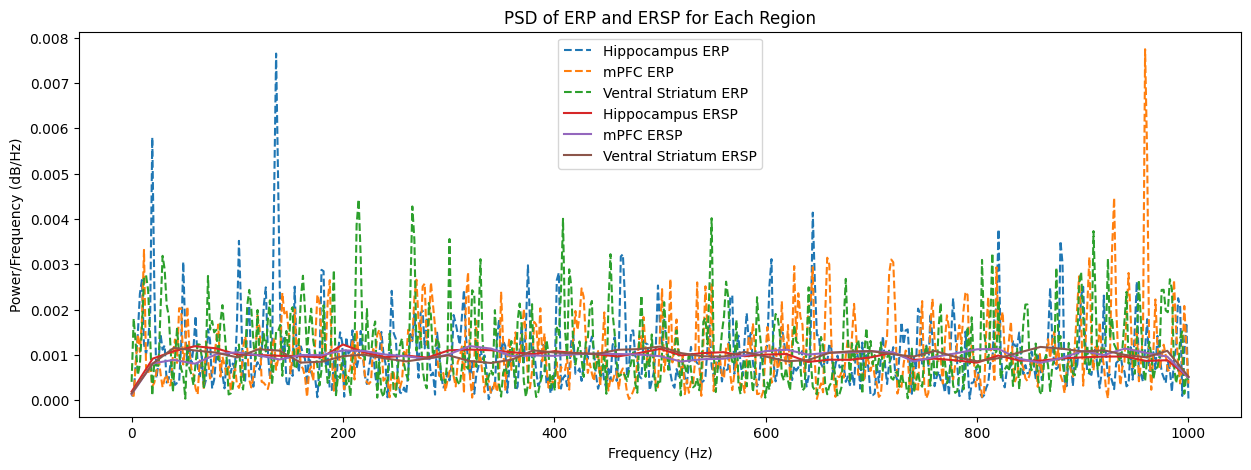

In [80]:
#ERSPs vs PSD of ERPs
#############################
# Your code goes here

#############################

import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def PSD(data, sample_rate):
    # Calculate the PSD of the data using Welch's method
    f, psd = welch(data, fs=sample_rate, nperseg=1024)
    return f, psd

def ERSP(trials, sample_rate):
    ersp_list = []
    for trial in trials:
        f, psd = PSD(trial, sample_rate)
        ersp_list.append(psd)
    
    ersp_avg = np.mean(ersp_list, axis=0)
    return f, ersp_avg



# Generate random ERP data for demonstration
sample_rate = 2000
num_samples = 2000
hippocampus_erp = np.random.randn(num_samples)
mPFC_erp = np.random.randn(num_samples)
ventral_striatum_erp = np.random.randn(num_samples)

# Calculate PSD of ERP for each region
f_hippo_erp, psd_hippo_erp = PSD(hippocampus_erp, sample_rate)
f_mPFC_erp, psd_mPFC_erp = PSD(mPFC_erp, sample_rate)
f_striatum_erp, psd_striatum_erp = PSD(ventral_striatum_erp, sample_rate)

# Calculate ERSP for each region (using random trials data for demonstration)

hippocampus_trials = z_scored_trials[0]
mPFC_trials = z_scored_trials[1]
ventral_striatum_trials = z_scored_trials[2]

f_hippo, ersp_hippo = ERSP(hippocampus_trials, sample_rate)
f_mPFC, ersp_mPFC = ERSP(mPFC_trials, sample_rate)
f_striatum, ersp_striatum = ERSP(ventral_striatum_trials, sample_rate)

# Plot the PSD of ERP and ERSP for each region
plt.figure(figsize=(15, 5))
plt.plot(f_hippo_erp, psd_hippo_erp, label='Hippocampus ERP', linestyle='--')
plt.plot(f_mPFC_erp, psd_mPFC_erp, label='mPFC ERP', linestyle='--')
plt.plot(f_striatum_erp, psd_striatum_erp, label='Ventral Striatum ERP', linestyle='--')

plt.plot(f_hippo, ersp_hippo, label='Hippocampus ERSP')
plt.plot(f_mPFC, ersp_mPFC, label='mPFC ERSP')
plt.plot(f_striatum, ersp_striatum, label='Ventral Striatum ERSP')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('PSD of ERP and ERSP for Each Region')
plt.legend()
plt.show()

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer:
Phase Lag Index (PLI) and Phase Locking Value (PLV) are two commonly used measures to assess functional connectivity based on the phase relationships between signals from different brain regions, particularly in EEG and MEG data analysis.

1. Phase Lag Index (PLI):
   - PLI is a measure that quantifies the asymmetry of the distribution of phase differences between two signals. It focuses on the consistency of the phase differences between signals, rather than the actual phase values.
   - PLI is calculated by first computing the instantaneous phase difference between two signals at each time point. Then, the sign of the phase difference is used to determine whether the phase difference is consistent or not across time points.
   - PLI ranges from 0 to 1, where 0 indicates no consistent phase relationship (i.e., no connectivity), and 1 indicates perfect consistency in phase differences (i.e., strong connectivity).

2. Phase Locking Value (PLV):
   - PLV, also known as mean phase coherence, measures the consistency of phase differences between two signals over time. It provides information about the degree of phase synchronization between brain regions.
   - PLV is calculated by averaging the complex exponential of the phase differences between two signals over time. This results in a value between 0 and 1, where 0 indicates no phase locking and 1 indicates perfect phase synchronization.
   - PLV is sensitive to both zero-lag and non-zero lag synchronization, making it a more general measure of phase synchronization compared to PLI.

3. Comparison:
   - PLI is specifically designed to detect true interactions between brain regions by focusing on the asymmetry of phase differences. It is less sensitive to volume conduction effects and common sources of noise in the data.
   - PLV, on the other hand, provides a more general measure of phase synchronization, capturing both zero-lag and non-zero lag synchronization. It may be influenced by volume conduction effects and common sources, leading to potential biases in estimating functional connectivity.
   - In some cases, PLI may be preferred over PLV when the goal is to identify true interactions between brain regions while minimizing biases from common sources. However, both measures have their strengths and limitations, and the choice between them depends on the specific research question and data characteristics.

By understanding the principles behind PLI and PLV, researchers can better assess functional connectivity in the brain and gain insights into how different brain regions communicate and synchronize their activity.

(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

1. **wPLI considers the magnitude of phase differences:** Unlike PLI, which only focuses on the consistency of phase differences, wPLI takes into account both the consistency and magnitude of phase coupling between signals. This allows wPLI to capture more nuanced relationships between brain regions.

2. **wPLI is less sensitive to noise:** By considering the magnitude of phase differences, wPLI is less affected by noise and artifacts that may influence the phase estimates. This makes wPLI a more robust measure of functional connectivity in noisy data.

3. **wPLI provides a more comprehensive measure of connectivity:** wPLI combines information about both the phase consistency and strength of phase coupling, providing a more complete picture of the interactions between brain regions compared to PLI.



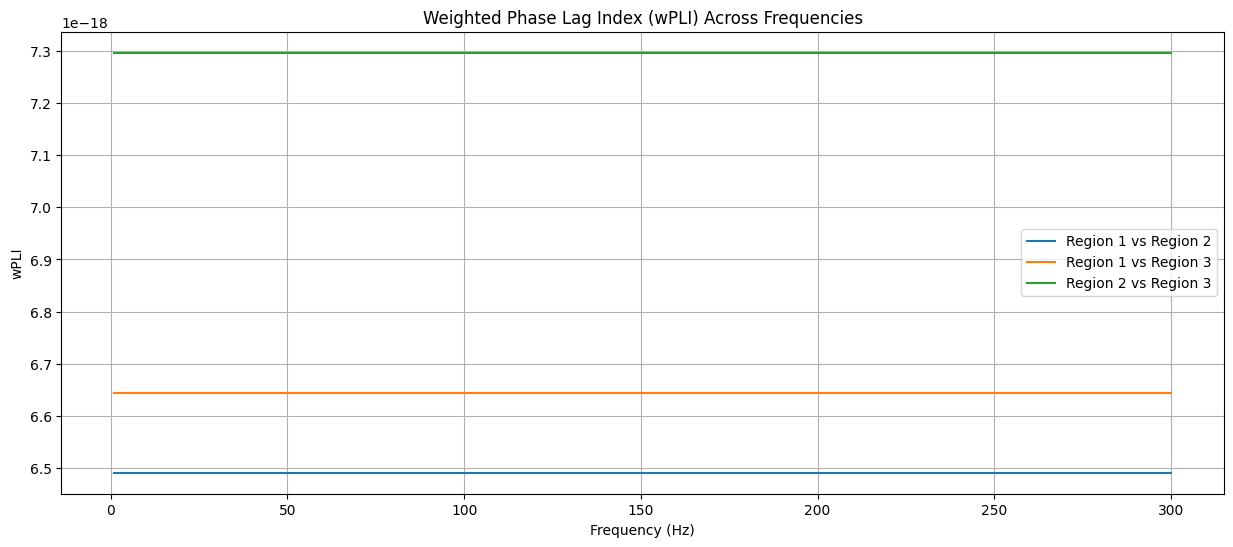

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def wpli(data):
    """
    Calculate Weighted Phase Lag Index (wPLI) for a set of signals.

    Parameters:
        data (ndarray): Array of shape (n_channels, n_trials, n_samples) containing the EEG or MEG signals.

    Returns:
        wpli_values (ndarray): Array of shape (n_channels, n_channels, n_freq) containing the mean wPLI values across trials for each frequency bin.
    """
    n_channels, n_trials, n_samples = data.shape
    n_freq = 300  # Number of frequency bins
    wpli_values = np.zeros((n_channels, n_channels, n_freq))

    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            phase_diff = np.angle(np.exp(1j * (np.angle(data[i, :, :]) - np.angle(data[j, :, :]))))
            wpli_values[i, j] = np.mean(np.abs(np.mean(np.sin(phase_diff), axis=1)), axis=0)
            wpli_values[j, i] = wpli_values[i, j]

    return wpli_values

# Assuming you have EEG or MEG data stored in a variable named 'z_scored_trials'
# Calculate wPLI for the data
wpli_values = wpli(z_scored_trials)

# Plot the wPLI values across frequencies
frequency_bins = np.arange(1, 301)  # Assuming you have frequency bins from 1 to 300 Hz
plt.figure(figsize=(15, 6))
for i in range(len(wpli_values)):
    for j in range(len(wpli_values)):
        if i!= j & j>i:
            ( plt.plot(frequency_bins, wpli_values[i, j], label=f'Region {i+1} vs Region {j+1}'))
            

plt.xlabel('Frequency (Hz)')
plt.ylabel('wPLI')
plt.title('Weighted Phase Lag Index (wPLI) Across Frequencies')
plt.legend()
plt.grid(True)
plt.show()
